In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
import numpy as np
from matplotlib import animation
from matplotlib.colors import BoundaryNorm
import matplotlib.colors as cols
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
from matplotlib import ticker, cm
import seaborn as sns

In [2]:
sst = np.loadtxt('iiinr.txt',delimiter=',')
lon = np.loadtxt('lon.txt',delimiter=',')
lat = np.loadtxt('lat.txt',delimiter=',')

In [3]:
sst.shape

(192, 32)

In [4]:
#SX = np.loadtxt('SX44.txt',delimiter=',')
#SY = np.loadtxt('SY44.txt',delimiter=',')

In [5]:
#sst = np.sqrt(sst)

In [6]:
xx, yy = np.meshgrid(lat, lon)

/scratch/user/xiliangdiao/.conda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  # Remove the CWD from sys.path while we load stuff.
findfont: Font family ['Cambria'] not found. Falling back to DejaVu Sans.


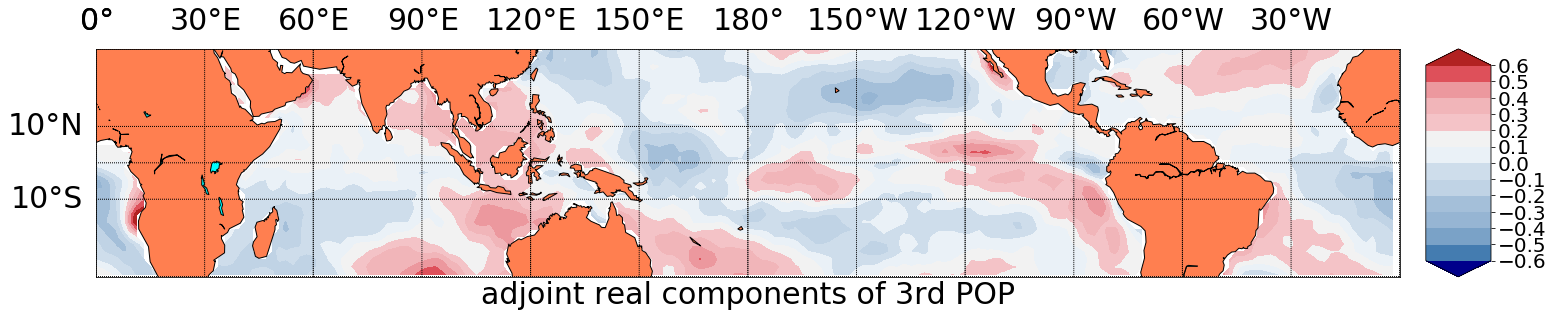

In [7]:
plt.figure(figsize=(25,25))
#nice_cmap=sns.diverging_palette(245, 15, n=13,as_cmap=True)
nice_cmap=sns.diverging_palette(245, 10, n=11,as_cmap=True)
lev_cmap = nice_cmap([1,20,40,60,70,80,90,100,110,120,130,150,160,170,190,210,240]) 
new_cmap = cols.ListedColormap(lev_cmap,"praj_cmap")
#nice_levels = [-0.8,-0.6,-0.4,-0.2,0,0.2,0.4,0.6,0.8]
nice_levels = [-0.6,-0.5,-0.4,-0.3,-0.2,-0.1,0,0.1,0.2,0.3,0.4,0.5,0.6]
my_font = {'fontname':'Cambria', 'size':'30'}
map = Basemap(projection='merc',llcrnrlat=-30,urcrnrlat=30,\
            llcrnrlon=0,urcrnrlon=360,lat_ts=20,resolution='c')
map.drawcoastlines()
map.fillcontinents(color='coral',lake_color='aqua')
# draw parallels and meridians.
map.drawparallels(np.arange(-90.,91.,30.))
map.drawmeridians(np.arange(-180.,181.,60.))
#map.drawmapboundary(fill_color='aqua')
#plt.title("Mercator Projection")
x,y=map(yy,xx)
CP = map.contourf(x,y,-sst,levels = nice_levels,cmap = new_cmap,extend='both')
#map.quiver(x,y,-SX,-SY,units='inches')
CP.cmap.set_over('firebrick')
CP.cmap.set_under('darkblue')
map.drawparallels(np.arange(-90,91,20),labels=[1,0,0,0],**my_font)
map.drawmeridians(np.arange(-180,180,30),labels=[0,0,1,0],**my_font)
cbar =map.colorbar(CP,extendfrac='auto',ticks=nice_levels)
cbar.ax.tick_params(labelsize=20) 
plt.xlabel("adjoint real components of 3rd POP",**my_font)
plt.savefig("iii2yyya.png",bbox_inches='tight')

In [8]:
np.nanmin(sst)

-0.69864